In [105]:
# Prediction of Delhi Air Quality Index(AQI) using Kaggle data set year 2015 to 2020 day wise


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [107]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [108]:
df.rename(columns={'PM2.5':'PM2x5'},inplace=True)

In [109]:
df.shape

(29531, 16)

In [110]:
# we only need  Delhi data

filter= df['City']=='Delhi'
data= df[filter]

In [111]:
data.head()

,City,Date,PM2x5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [112]:
data.shape

(2009, 16)

In [113]:
data.isna().sum()

City            0
Date            0
PM2x5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [114]:
# Droping a Xylene column: it has more 38% missing values,
# Although we can replace with mean or mode but due to high % of missing values, it is no longer reliable for predication

In [115]:
data.drop(['Xylene'],axis=1,inplace=True)



In [116]:
data.isna().sum()

City            0
Date            0
PM2x5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
AQI            10
AQI_Bucket     10
dtype: int64

In [117]:
data.shape

(2009, 15)

In [118]:
data.dtypes

City           object
Date           object
PM2x5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket     object
dtype: object

In [119]:
# Since we are going for regression, we dont need AQI_Bucket feature, we will drop it
# we will drop City name Delhi also 

In [120]:
data.drop(['AQI_Bucket','City'],axis=1,inplace=True)

In [121]:
data.head()

,Date,PM2x5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
10229,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0
10230,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0
10231,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0
10232,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0
10233,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0


In [122]:
# we will convert time stemp in to date, month and year

In [123]:
data['Date']=pd.to_datetime(data['Date'])

In [124]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data.head()

,Date,PM2x5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Day,Month,Year
10229,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,1,1,2015
10230,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,2,1,2015
10231,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,3,1,2015
10232,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,4,1,2015
10233,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,5,1,2015


In [125]:
data.drop(['Date'],axis=1,inplace=True)

In [126]:
data.head()

,PM2x5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Day,Month,Year
10229,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,1,1,2015
10230,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,2,1,2015
10231,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,3,1,2015
10232,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,4,1,2015
10233,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,5,1,2015


In [127]:
data['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [128]:
# we will drop year also, it will give deviate if year is given in higher no.s
data.drop(['Year'],axis=1,inplace=True)

In [129]:
data.isna().sum()

PM2x5        2
PM10        77
NO           2
NO2          2
NOx          0
NH3          9
CO           0
SO2        110
O3          84
Benzene      0
Toluene      0
AQI         10
Day          0
Month        0
dtype: int64

In [130]:
data.dtypes

PM2x5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
AQI        float64
Day          int64
Month        int64
dtype: object

In [131]:
# missing value replace with mean values

In [132]:
data_copy = data
list=['PM2x5','PM10','NO','NO2','NH3','SO2','O3','AQI']
def missing_values(col):
    data_copy[col]=data_copy[col].fillna(data_copy[col].mean())

for col in list:
    missing_values(col)

In [133]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2x5    2009 non-null   float64
 1   PM10     2009 non-null   float64
 2   NO       2009 non-null   float64
 3   NO2      2009 non-null   float64
 4   NOx      2009 non-null   float64
 5   NH3      2009 non-null   float64
 6   CO       2009 non-null   float64
 7   SO2      2009 non-null   float64
 8   O3       2009 non-null   float64
 9   Benzene  2009 non-null   float64
 10  Toluene  2009 non-null   float64
 11  AQI      2009 non-null   float64
 12  Day      2009 non-null   int64  
 13  Month    2009 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 235.4 KB


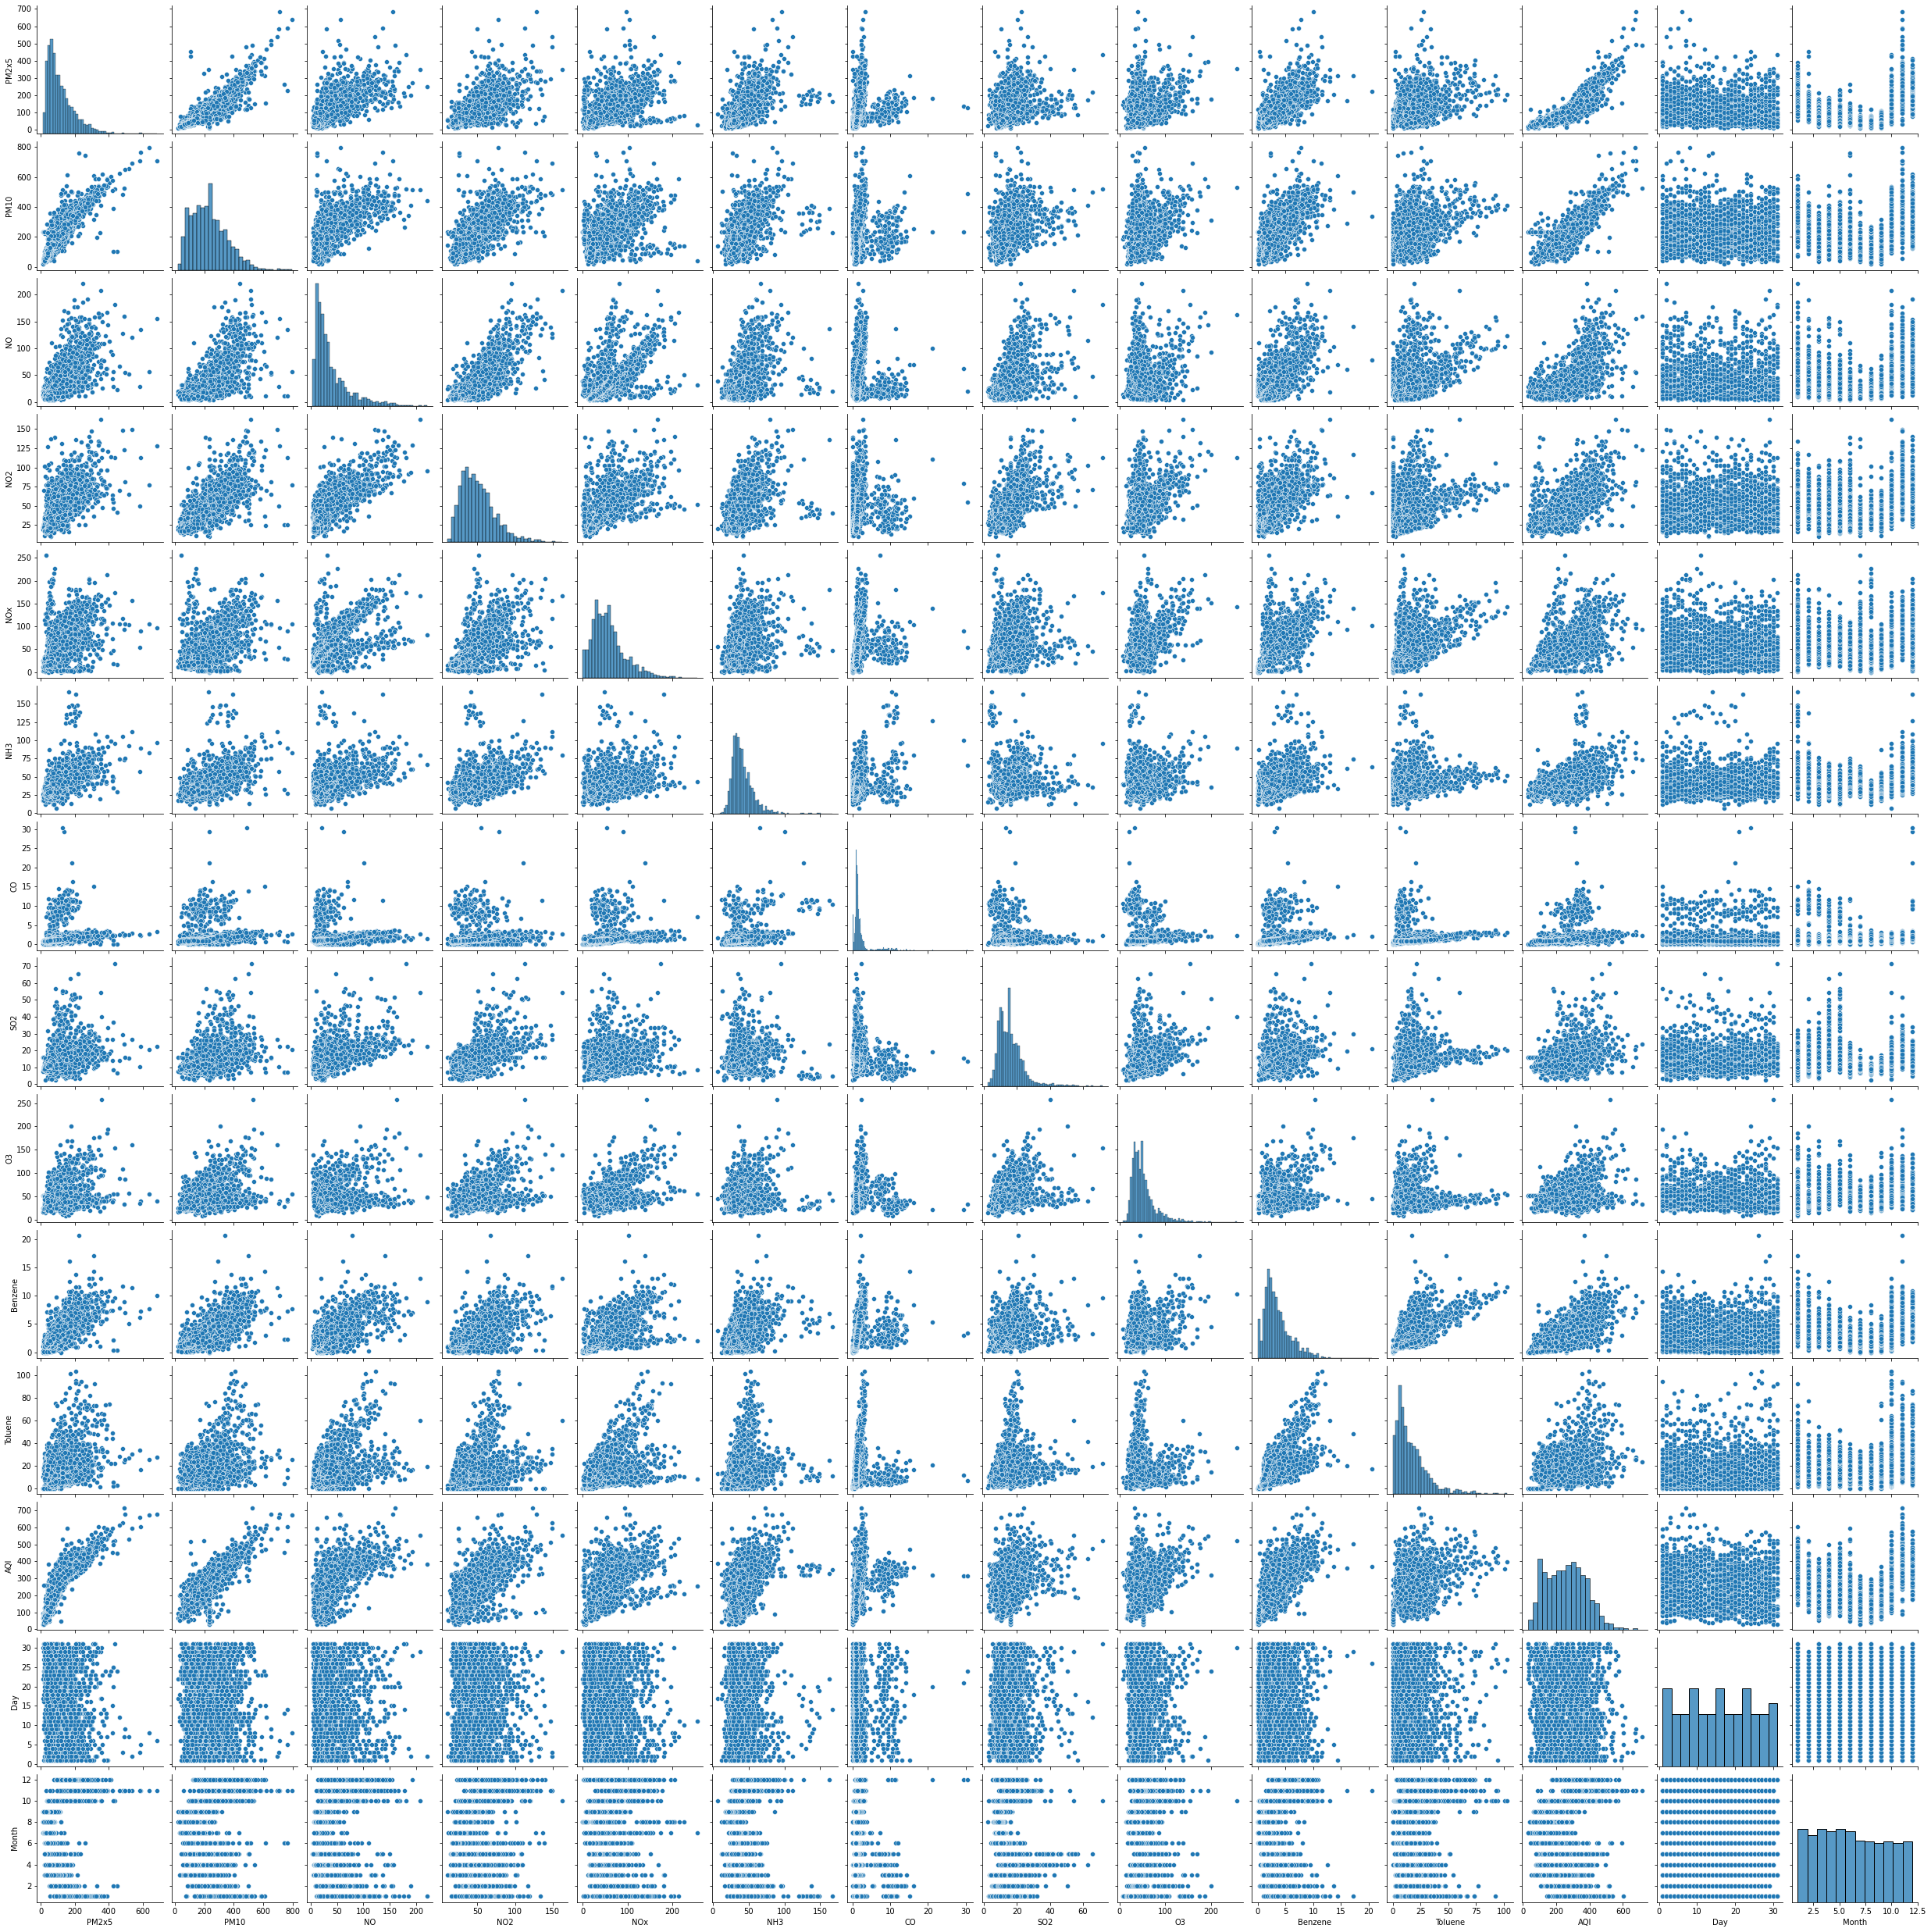

In [134]:
sns.pairplot(data=data_copy)

In [135]:
y= data_copy['AQI']
X= data_copy.drop(['AQI'],axis=1)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=50)

In [137]:
X_train

,PM2x5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Day,Month
11824,84.81,191.04,31.89,57.75,59.46,43.80,1.52,20.93,41.85,5.07,36.61,15,5
10950,187.30,399.43,99.49,82.03,51.92,50.67,1.14,24.90,37.52,5.12,9.98,22,12
10462,46.74,149.06,26.74,40.28,61.52,28.20,0.90,9.56,52.48,2.13,6.50,22,8
10474,99.50,278.36,33.04,35.31,67.05,17.86,1.17,9.82,72.94,3.85,10.55,3,9
10993,194.99,427.02,155.90,88.38,66.62,62.33,1.26,19.98,39.02,5.72,14.11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11542,50.64,131.76,19.28,26.59,32.23,45.36,0.90,9.40,27.42,1.44,22.79,6,8
10338,121.51,336.63,18.14,60.41,68.41,33.63,6.75,20.98,87.04,3.08,10.20,20,4
12160,58.31,190.98,10.37,24.55,24.05,28.36,0.93,14.89,38.22,2.36,11.89,15,4
11733,198.26,336.99,65.24,70.04,96.09,47.95,1.94,18.61,43.36,6.60,46.95,13,2


In [138]:
from sklearn.linear_model import LinearRegression

model1= LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8547991218752564

<AxesSubplot:xlabel='AQI', ylabel='Density'>

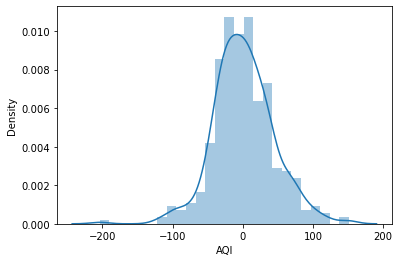

In [139]:
sns.distplot(y_test-model1.predict(X_test))

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

model2= GradientBoostingRegressor()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8941565398386808

<AxesSubplot:xlabel='AQI', ylabel='Density'>

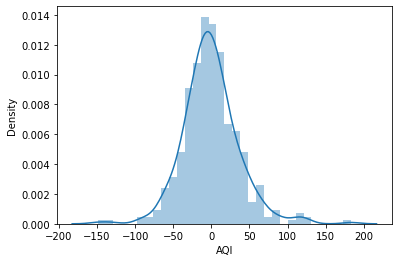

In [141]:
sns.distplot(y_test-model2.predict(X_test))

In [142]:
from sklearn.ensemble import RandomForestRegressor
model3= RandomForestRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8992491654143054

<AxesSubplot:xlabel='AQI', ylabel='Density'>

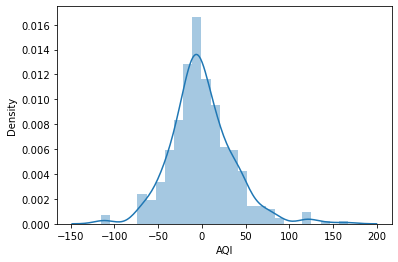

In [143]:
sns.distplot(y_test-model3.predict(X_test))

In [144]:
model2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [145]:
# Hyperparameter tuning of Randomforest Regressor

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
bootstrap = [True, False]

max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

max_features = ['auto', 'sqrt']

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 3, 4]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [148]:
random_search= (RandomizedSearchCV(estimator=model3,
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=None,
    return_train_score=True))


In [149]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=911; total time=  10.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=911; total time=  10.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=911; total time=  10.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=911; total 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   return_train_score=True, verbose=2)

In [150]:
random_search.best_params_

{'n_estimators': 911,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [151]:
from sklearn.ensemble import RandomForestRegressor
model_tuned= RandomForestRegressor(n_estimators=900,
 min_samples_split= 5,
 min_samples_leaf= 3,
 max_features='auto',
 max_depth= 70,
 bootstrap= True)


model_tuned.fit(X_train,y_train)
model_tuned.score(X_test,y_test)

0.8979647081239202

In [155]:
X.columns

Index(['PM2x5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Day', 'Month'],
      dtype='object')

In [158]:
# saving the model 
import pickle 
pickle_out = open("AQI_Delhi.pkl", mode = "wb") 
pickle.dump(model_tuned, pickle_out) 
pickle_out.close()

In [159]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('AQI_Delhi.pkl', 'rb') 
AQI_Delhi = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(PM2x5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3,Benzene, Toluene, Day, Month):      
      
    # Making predictions 
    prediction = AQI_Delhi.predict([[PM2x5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3,Benzene, Toluene, Day, Month]])
    return prediction    
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:cyan;padding:13px"> 
    <h1 style ="color:black;text-align:center;">AQI of Delhi Prediction</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
   
    
    Month= st.selectbox('Month',(1,2,3,4,5,6,7,8,9,10,11,12))
    Day = st.selectbox('Month',(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31))
    PM2x5 = st.number_input( "PM2.5" )
    PM10 = st.number_input( "PM10" )
    NO= st.number_input( "NO" )
    NO2 = st.number_input( "NO2" )
    NOx = st.number_input( "NOx" )
    NH3 = st.number_input( "NH3" )
    CO = st.number_input( "CO" )
    SO2 = st.number_input( "SO2" )
    O3 = st.number_input( "O3" )
    Benzene = st.number_input( "Benzene" )
    Toluene = st.number_input( "Toluene" )
    

    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction( PM2x5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3,Benzene, Toluene, Day, Month) 
        st.success('AQI of Delhi: {}'.format(result))
        
     
if __name__=='__main__': 
    main()

Overwriting app.py
